**Predicting which customers will purchase a quoted insurance plan**

**1. Reading data from the given CSV files that is stored in Google Drive.**

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


---



**2. Load train data from csv file.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from datetime import datetime

dataPath = '/gdrive/MyDrive/PGD Assignment Notebooks/train.csv'
df = pd.read_csv(dataPath)
print("Total no. of records in train dataset is: {0}".format(df['QuoteNumber'].count()))
#df.rename(columns={'GeographicField64' : 'State', 'Field7' : 'BMI', 'Field12' : 'Is_Smoker', 'PropertyField37': 'IS_Urban', 'Field10' : 'Premium_Amount', 'PersonalField11': 'Family_Size', 'PropertyField14' :'Property_Type'}, inplace = True)

df

Total no. of records in train dataset is: 260753


QuoteNumber Original_Quote_Date  ...  GeographicField63 GeographicField64
0                 1          2013-08-16  ...                  N                CA
1                 2          2014-04-22  ...                  N                NJ
2                 4          2014-08-25  ...                  N                NJ
3                 6          2013-04-15  ...                  N                TX
4                 8          2014-01-25  ...                  N                IL
...             ...                 ...  ...                ...               ...
260748       434584          2013-05-16  ...                  N                TX
260749       434585          2014-12-07  ...                  N                TX
260750       434586          2014-02-18  ...                  N                NJ
260751       434587          2014-04-08  ...                  N                NJ
260752       434588          2013-03-19  ...                  N                NJ

[260753 rows x 299 columns]

***Observation:*** Based on the existing feature names, renamed some of the features for better understanding of the feature.

---



**3. Let's split the "Original_Quote_Date" feature into Year, Month and Is_Weekend to add more features to the existing train dataset.**

---



In [3]:
str_date = df['Original_Quote_Date']
year_lst=[]
month_lst=[]
weekend_lst=[]
date_lst=[]

for i in str_date:
  year_lst.append(int(i[0:4]))
  month_lst.append(int(i[5:7]))
  date_lst.append(int(i[8:]))
  d = datetime(int(i[0:4]), int(i[5:7]), int(i[8:]))
  if d.weekday() > 4:
    weekend_lst.append(1)
  else:
    weekend_lst.append(0)

df['Year'] = year_lst
df['Month'] = month_lst
df['Is_Weekend'] = weekend_lst

df.drop(['Original_Quote_Date'], axis = 1, inplace = True)

df

QuoteNumber  QuoteConversion_Flag Field6  ...  Year  Month  Is_Weekend
0                 1                     0      B  ...  2013      8           0
1                 2                     0      F  ...  2014      4           0
2                 4                     0      F  ...  2014      8           0
3                 6                     0      J  ...  2013      4           0
4                 8                     0      E  ...  2014      1           1
...             ...                   ...    ...  ...   ...    ...         ...
260748       434584                     0      J  ...  2013      5           0
260749       434585                     0      J  ...  2014     12           1
260750       434586                     0      F  ...  2014      2           0
260751       434587                     0      F  ...  2014      4           0
260752       434588                     0      F  ...  2013      3           0

[260753 rows x 301 columns]

***Observation:*** Split the Original_Quote_Date into Month, Year and IS_Weekend and add it as extra features to the original train dataset. Hence we are adding more features to the existing train dataset.

---



**4. Get the Categorical Features and its count.**

---


In [4]:
#Using LabelEncoder, convert String to Numeric Feature for the features having unique count greater than 5.

cols = df.columns
num_cols = df._get_numeric_data().columns

categorical_features = sorted(list(set(cols) - set(num_cols)))
df_cat_features_lt_str = df[categorical_features].nunique().to_frame().to_string()

#Give names to the output data
df_cat_features_lt = pd.read_csv(StringIO(df_cat_features_lt_str), sep='\s+', names = ['Field', 'Unique_Count'])
df_cat_features_lt = df_cat_features_lt[df_cat_features_lt.Field != '0']

df_cat_features_lt

#from sklearn.preprocessing import LabelEncoder

#for i in df_cat_features_lt[df_cat_features_lt['Unique_Count'] >5]['Field']:
#  df[i] = enc = LabelEncoder().fit_transform(df[i])

#df

Field  Unique_Count
1      CoverageField8           7.0
2      CoverageField9          12.0
3             Field10           8.0
4             Field12           2.0
5              Field6           8.0
6   GeographicField63           3.0
7   GeographicField64           4.0
8     PersonalField16          50.0
9     PersonalField17          66.0
10    PersonalField18          61.0
11    PersonalField19          57.0
12     PersonalField7           2.0
13    PropertyField14           4.0
14    PropertyField28           4.0
15     PropertyField3           2.0
16    PropertyField30           2.0
17    PropertyField31           4.0
18    PropertyField32           2.0
19    PropertyField33           4.0
20    PropertyField34           2.0
21    PropertyField36           2.0
22    PropertyField37           2.0
23    PropertyField38           2.0
24     PropertyField4           2.0
25     PropertyField5           2.0
26     PropertyField7          19.0
27        SalesField7           7.0

***Observation:*** Convert String to Numeric Feature using LabelEncoder for the features having unique count of greater than 5.

---



**5. Replace values having only 'Y' or 'N' to 1 and 0 respectively.**

---

In [5]:
features_only_two = [] 
features_only_two = df_cat_features_lt[df_cat_features_lt['Unique_Count'] == 2]['Field']

# Converting categorical features having only 2 values into numerical 1's and 0's.
for j in df_cat_features_lt.loc[(df_cat_features_lt['Unique_Count'] == 2)]['Field']:
  df[j].replace({'Y' : 1, 'N' : 0}, inplace = True)

for i in features_only_two:
  index_name = df_cat_features_lt[df_cat_features_lt['Field'] == i].index
  df_cat_features_lt.drop(index_name, inplace = True)

df_cat_features_lt


Field  Unique_Count
1      CoverageField8           7.0
2      CoverageField9          12.0
3             Field10           8.0
5              Field6           8.0
6   GeographicField63           3.0
7   GeographicField64           4.0
8     PersonalField16          50.0
9     PersonalField17          66.0
10    PersonalField18          61.0
11    PersonalField19          57.0
13    PropertyField14           4.0
14    PropertyField28           4.0
17    PropertyField31           4.0
19    PropertyField33           4.0
26     PropertyField7          19.0
27        SalesField7           7.0

**6. Using One-Hot Encoding to convert String to Numeric Features.**

---

In [6]:
#Using One-Hot Encoding to convert String to Numeric Features.

from sklearn.preprocessing import OneHotEncoder

for i in df_cat_features_lt['Field']:
  enc = OneHotEncoder(handle_unknown = 'ignore')
  enc_df_state = pd.DataFrame(enc.fit_transform(df[[i]]).toarray())
  enc_df_state.columns = enc.get_feature_names([i])
  df = df.join(enc_df_state)
  df.drop([i], axis = 1, inplace = True)

df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

QuoteNumber  QuoteConversion_Flag  ...  SalesField7_T  SalesField7_V
0                 1                     0  ...            0.0            1.0
1                 2                     0  ...            0.0            0.0
2                 4                     0  ...            0.0            0.0
3                 6                     0  ...            0.0            1.0
4                 8                     0  ...            0.0            0.0
...             ...                   ...  ...            ...            ...
260748       434584                     0  ...            0.0            0.0
260749       434585                     0  ...            1.0            0.0
260750       434586                     0  ...            0.0            0.0
260751       434587                     0  ...            0.0            0.0
260752       434588                     0  ...            0.0            0.0

[260753 rows x 603 columns]

***Observation:*** Convert all the Categorical features to Numeric features using One-Hot Encoding which increased the number of feature count to 603.

---



**7. Calculate the Categorical features. It should be blank as we have converted all Categorical features to Numeric.**

---

In [7]:
# Calculate the Categorical features.
# It should be blank as we have converted all Categorical features to Numeric.

cols = df.columns
num_cols = df._get_numeric_data().columns

categorical_features = sorted(list(set(cols) - set(num_cols)))
df_cat_features_str = df[categorical_features].nunique().to_frame().to_string()

#Give names to the output data
print("Categorical Features and their Count!\n-------------------------------------")
df_cat_features = pd.read_csv(StringIO(df_cat_features_str), sep='\s+', names = ['Field', 'Unique_Count'])
df_cat_features = df_cat_features[df_cat_features.Field != '0']
df_cat_features

# CoverageField9 -> 1 to 12 numbers

Categorical Features and their Count!
-------------------------------------


Field Unique_Count
0     Empty    DataFrame
1  Columns:          [0]
2    Index:           []

***Observation:*** Now all the Categorical features are being converted to Numeric features.

---



**8. Removing high Correlated features from the train dataset.**

---

In [8]:
# Removing high correlated features from the train dataset.
from numpy import cov

field_cols = []
for i in df.columns:
  if i.startswith('Field'):
    field_cols.append(i)

coverage_field_cols = []
for i in df.columns:
  if i.startswith('CoverageField'):
    coverage_field_cols.append(i)

sales_field_cols = []
for i in df.columns:
  if i.startswith('SalesField'):
    sales_field_cols.append(i)

personal_field_cols = []
for i in df.columns:
  if i.startswith('PersonalField'):
    personal_field_cols.append(i)

property_field_cols = []
for i in df.columns:
  if i.startswith('PropertyField'):
    property_field_cols.append(i)

graphic_field_cols = []
for i in df.columns:
  if i.startswith('GeographicField'):
    graphic_field_cols.append(i)

all_features_list = ['field_cols', 'coverage_field_cols', 'sales_field_cols', 'personal_field_cols', 'property_field_cols', 'graphic_field_cols']

total_high_corr_features=[]

corr_matrix = df[field_cols].corr().abs()
corr_limit = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
remove_high_corr_features = [col for col in corr_limit.columns if any(corr_limit[col] > 0.9)]
print("High Corr Feature that can be removed for Field is:{0}".format(remove_high_corr_features))
if (len(remove_high_corr_features) != 0):
  total_high_corr_features.extend(remove_high_corr_features)

corr_matrix = df[coverage_field_cols].corr().abs()
corr_limit = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
remove_high_corr_features = [col for col in corr_limit.columns if any(corr_limit[col] > 0.9)]
print("High Corr Feature that can be removed for CoverageField is:{0}".format(remove_high_corr_features))
if (len(remove_high_corr_features) != 0):
  total_high_corr_features.extend(remove_high_corr_features)

corr_matrix = df[sales_field_cols].corr().abs()
corr_limit = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
remove_high_corr_features = [col for col in corr_limit.columns if any(corr_limit[col] > 0.9)]
print("High Corr Feature that can be removed for SalesField is:{0}".format(remove_high_corr_features))
if (len(remove_high_corr_features) != 0):
  total_high_corr_features.extend(remove_high_corr_features)

corr_matrix = df[personal_field_cols].corr().abs()
corr_limit = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
remove_high_corr_features = [col for col in corr_limit.columns if any(corr_limit[col] > 0.9)]
print("High Corr Feature that can be removed for PersonalField is:{0}".format(remove_high_corr_features))
if (len(remove_high_corr_features) != 0):
  total_high_corr_features.extend(remove_high_corr_features)

corr_matrix = df[property_field_cols].corr().abs()
corr_limit = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
remove_high_corr_features = [col for col in corr_limit.columns if any(corr_limit[col] > 0.9)]
print("High Corr Feature that can be removed for PropertyField is:{0}".format(remove_high_corr_features))
if (len(remove_high_corr_features) != 0):
  total_high_corr_features.extend(remove_high_corr_features)

corr_matrix = df[graphic_field_cols].corr().abs()
corr_limit = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
remove_high_corr_features = [col for col in corr_limit.columns if any(corr_limit[col] > 0.9)]
print("High Corr Feature that can be removed for GeographicField is:{0}".format(remove_high_corr_features))
if (len(remove_high_corr_features) != 0):
  total_high_corr_features.extend(remove_high_corr_features)

print("Total High Corr Features:\n{0}".format(total_high_corr_features))
print("Total High Corr Feature Count:\n{0}".format(total_high_corr_features.count))

df.drop(columns=total_high_corr_features, inplace = True)

High Corr Feature that can be removed for Field is:['Field6_B', 'Field6_F']
High Corr Feature that can be removed for CoverageField is:['CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField11B']
High Corr Feature that can be removed for SalesField is:['SalesField12', 'SalesField15']
High Corr Feature that can be removed for PersonalField is:['PersonalField2', 'PersonalField4B', 'PersonalField10B', 'PersonalField23', 'PersonalField24', 'PersonalField25', 'PersonalField26', 'PersonalField32', 'PersonalField33', 'PersonalField35', 'PersonalField36', 'PersonalField37', 'PersonalField38', 'PersonalField41', 'PersonalField42', 'PersonalField43', 'PersonalField44', 'PersonalField45', 'PersonalField46', 'PersonalField47', 'PersonalField48', 'PersonalField50', 'PersonalField51', 'PersonalField52', 'PersonalField53', 'PersonalField55', 'PersonalField56', 'PersonalField57', 'PersonalField58', 'PersonalFi

***Observation:*** Group the features according to the main Features called Field, CoverageField, SalesField, PersonalField, PropertyField and GeographicField.

>


***Conclusion:*** We are removing the highly correlated features to avoid the multicollinearity, i.e., if two features are highly correlated, then they will have nearly exact information. Including both the features may impact/weaken the model.

---


**9. Drop the features which are not necessary or doesn't give importance to the model, i.e., get the fields in the original DataFrame where any field which has only one value in the whole dataset and drop those fields as it is not needed or not useful or stand-alone feature in prediction.**

---



In [9]:
#Get the unique values for each Field in the DataFrame and converting to String to give header to the output for easy of querying the dataset in DataFrame.
df_str = df.nunique().to_frame().to_string()

#Give names to the output data
df_new = pd.read_csv(StringIO(df_str), sep='\s+', names = ['Field', 'Unique_Count'])

#Will ignore the unwanted field with field value '0' from the new DataFrame
df_drop_features = df_new.loc[1:]

#List the unique fields having a single value in the entire train dataset
df_drop_features['Unique_Count'].astype(int)

#Finally drop the fields from the train dataset
fieldsToDrop = df_drop_features[df_drop_features['Unique_Count'] == 1]['Field'].values;
print("Features that are being dropped from the train dataset are: \n{0}".format(fieldsToDrop))

df.drop(columns=fieldsToDrop, axis = 1, inplace = True)

df.drop(columns=['QuoteNumber'], inplace=True)

Features that are being dropped from the train dataset are: 
['PropertyField6' 'GeographicField10A']


***Observation:*** Dropping the stand-alone features which doesn't add any value in prediction and also dropping the unique QuoteNumber as well.

---


**10. Replacing all -1's to NaN.**

---


In [10]:
# Replacing all -1 values to NaN values from the train dataset.

for col in df:
  df[col].replace({-1 : np.nan}, inplace = True)

***Observation:*** Once replaced -1's to NaN, we will then convert all NaN to a numeric values using some Imputers.

---


**11. Get the featurs which has empty/NaN values and their count and their percentage.**

---


In [11]:
#Get the features which has empty/NaN values and their count and their percentage.
total_count = df.shape[0]

print("Features having Empty/NULL/NaN value count!\n-------------------------------------------")
dfsr = df.isnull().sum()
df_nan = dfsr[dfsr.values != 0].to_frame().to_string()

#Give names to the output data
df_nan_new = pd.read_csv(StringIO(df_nan), sep='\s+', names = ['Field', 'Nan_Count', 'Nan_Percent'])

df_nan_new = df_nan_new[df_nan_new.Field != '0']
df_nan_new

# Get the NaN percentage from the total count.
df_null = df[df.columns[df.eq(-1).any()]]
total_null_cols = df_null.columns
nan_new_count = df_nan_new['Field'].count()

for i in total_null_cols:
  nan_new_count += 1
  df_nan_new.loc[nan_new_count] = [i] + [int(df.QuoteNumber[df[i] == -1].count())] + [0]

for ind, j in df_nan_new.iterrows():
  df_nan_new['Nan_Percent'] = round((df_nan_new['Nan_Count'] / total_count)*100,2)

df_nan_new

Features having Empty/NULL/NaN value count!
-------------------------------------------


Field  Nan_Count  Nan_Percent
1      CoverageField1A      362.0         0.14
2     CoverageField11A      765.0         0.29
3         SalesField2A      362.0         0.14
4         SalesField2B      362.0         0.14
5      PersonalField4A    24526.0         9.41
..                 ...        ...          ...
81  GeographicField60B       12.0         0.00
82  GeographicField61A   254170.0        97.48
83  GeographicField61B       12.0         0.00
84  GeographicField62A   254144.0        97.47
85  GeographicField62B       22.0         0.01

[85 rows x 3 columns]

***Observation:*** There are 85 features having atleast one NaN value.

---


**12. Dropping the features that has more than 90% of NULL/NaN values.**

---


In [12]:
#Dropping the features that has more than 75% of NULL/NaN values.

for k in df_nan_new[df_nan_new['Nan_Percent'] > 90].Field:
  df.drop(columns=k, axis = 1, inplace = True)

df


QuoteConversion_Flag  Field7  ...  SalesField7_T  SalesField7_V
0                          0      23  ...            0.0            1.0
1                          0       7  ...            0.0            0.0
2                          0       7  ...            0.0            0.0
3                          0      10  ...            0.0            1.0
4                          0      23  ...            0.0            0.0
...                      ...     ...  ...            ...            ...
260748                     0      23  ...            0.0            0.0
260749                     0      26  ...            1.0            0.0
260750                     0      11  ...            0.0            0.0
260751                     0       7  ...            0.0            0.0
260752                     0      15  ...            0.0            0.0

[260753 rows x 453 columns]

***Observation:*** Since there more NULL/NaN values and by removing those features from the train dataset, we can get more retain more accurate data.

---


**13. Get the features having NULL/NaN values of less than 90%.**

---


In [13]:
# Get the features having NULL/NaN values of less than 75%
#df_nan_new[df_nan_new['Nan_Percent'] < 75]

df_nan_new_cnt = df_nan_new[df_nan_new['Nan_Percent'] < 90]

#df_nan_new_cnt
cnt = 0

for i in df_nan_new_cnt.Field:
  #print("Feature is {0} and Unique Count is {1}".format(i, df[i].nunique()))
  df_nan_new_cnt.loc[df_nan_new_cnt.Field == i, 'Unique_Count'] = df[i].nunique()

df_nan_new_cnt

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Field  Nan_Count  Nan_Percent  Unique_Count
1      CoverageField1A      362.0         0.14          25.0
2     CoverageField11A      765.0         0.29          25.0
3         SalesField2A      362.0         0.14          25.0
4         SalesField2B      362.0         0.14          25.0
5      PersonalField4A    24526.0         9.41          25.0
..                 ...        ...          ...           ...
78  GeographicField58A       11.0         0.00          25.0
79  GeographicField59A        2.0         0.00          25.0
81  GeographicField60B       12.0         0.00          25.0
83  GeographicField61B       12.0         0.00          24.0
85  GeographicField62B       22.0         0.01          18.0

[73 rows x 4 columns]

***Observation:*** There are 72 features having less than 25% of NULL/NaN.

---

**14. Using SimpleImputer, convert all NULL/NaN valuse to a Numeric value using MEAN strategy.**

---

In [14]:
# Using SimpleImputer to convert all NULL/NaN values to a numeric value using "MEAN" strategy.

dfsr = df.isnull().sum()
df_nan = dfsr[dfsr.values != 0].to_frame().to_string()
df_nan

#Give names to the output data
df_nan_new = pd.read_csv(StringIO(df_nan), sep='\s+', names = ['Field', 'Nan_Count', 'Nan_Percent'])

df_nan_new = df_nan_new[df_nan_new.Field != '0']
df_nan_new

final_df = df.copy()

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputer = imputer.fit(df[df_nan_new.Field])

final_df[df_nan_new.Field] = imputer.transform(df[df_nan_new.Field])

final_df

QuoteConversion_Flag  Field7  ...  SalesField7_T  SalesField7_V
0                          0      23  ...            0.0            1.0
1                          0       7  ...            0.0            0.0
2                          0       7  ...            0.0            0.0
3                          0      10  ...            0.0            1.0
4                          0      23  ...            0.0            0.0
...                      ...     ...  ...            ...            ...
260748                     0      23  ...            0.0            0.0
260749                     0      26  ...            1.0            0.0
260750                     0      11  ...            0.0            0.0
260751                     0       7  ...            0.0            0.0
260752                     0      15  ...            0.0            0.0

[260753 rows x 453 columns]

***Observation:*** Finally brought down the number of features to 178 including QuoteConverstion_Flag.

---

**15. Re-checking if there are any missing values in any feature.**

---

In [15]:
#Again calculate the Features and their NaN percentage.
# It should be blank as we have converted all NULL/NaN features to Numeric.

total_count = final_df.shape[0]

print("Features having Empty/NULL/NaN value count!\n-------------------------------------------")
dfsr = final_df.isnull().sum()
df_nan = dfsr[dfsr.values != 0].to_frame().to_string()
#df_nan

#Give names to the output data
df_nan_new = pd.read_csv(StringIO(df_nan), sep='\s+', names = ['Field', 'Nan_Count', 'Nan_Percent'])

df_nan_new = df_nan_new[df_nan_new.Field != '0']

# Get the NaN percentage from the total count.
df_null = final_df[final_df.columns[final_df.eq(-1).any()]]

total_null_cols = df_null.columns

nan_new_count = df_nan_new['Field'].count()

total_null_cols

Features having Empty/NULL/NaN value count!
-------------------------------------------


Index([], dtype='object')

***Observation:*** There are no Empty/NULL/NaN values in any of the feature.

---

**16. Grouping the features.**

---

In [16]:
field_cols = []
for i in df.columns:
  if i.startswith('Field'):
    field_cols.append(i)

coverage_field_cols = []
for i in df.columns:
  if i.startswith('CoverageField'):
    coverage_field_cols.append(i)

sales_field_cols = []
for i in df.columns:
  if i.startswith('SalesField'):
    sales_field_cols.append(i)

personal_field_cols = []
for i in df.columns:
  if i.startswith('PersonalField'):
    personal_field_cols.append(i)

property_field_cols = []
for i in df.columns:
  if i.startswith('PropertyField'):
    property_field_cols.append(i)

graphic_field_cols = []
for i in df.columns:
  if i.startswith('GeographicField'):
    graphic_field_cols.append(i)

all_features_list = ['field_cols', 'coverage_field_cols', 'sales_field_cols', 'personal_field_cols', 'property_field_cols', 'graphic_field_cols']


**17. Get the top correlated feature having correlated value > 0.70 and lessthan 1.000000 for each grouped features.**

---

**17.a. Field Features**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['Field8', 'Field9', 'Field12', 'Field10_548', 'Field6_K']


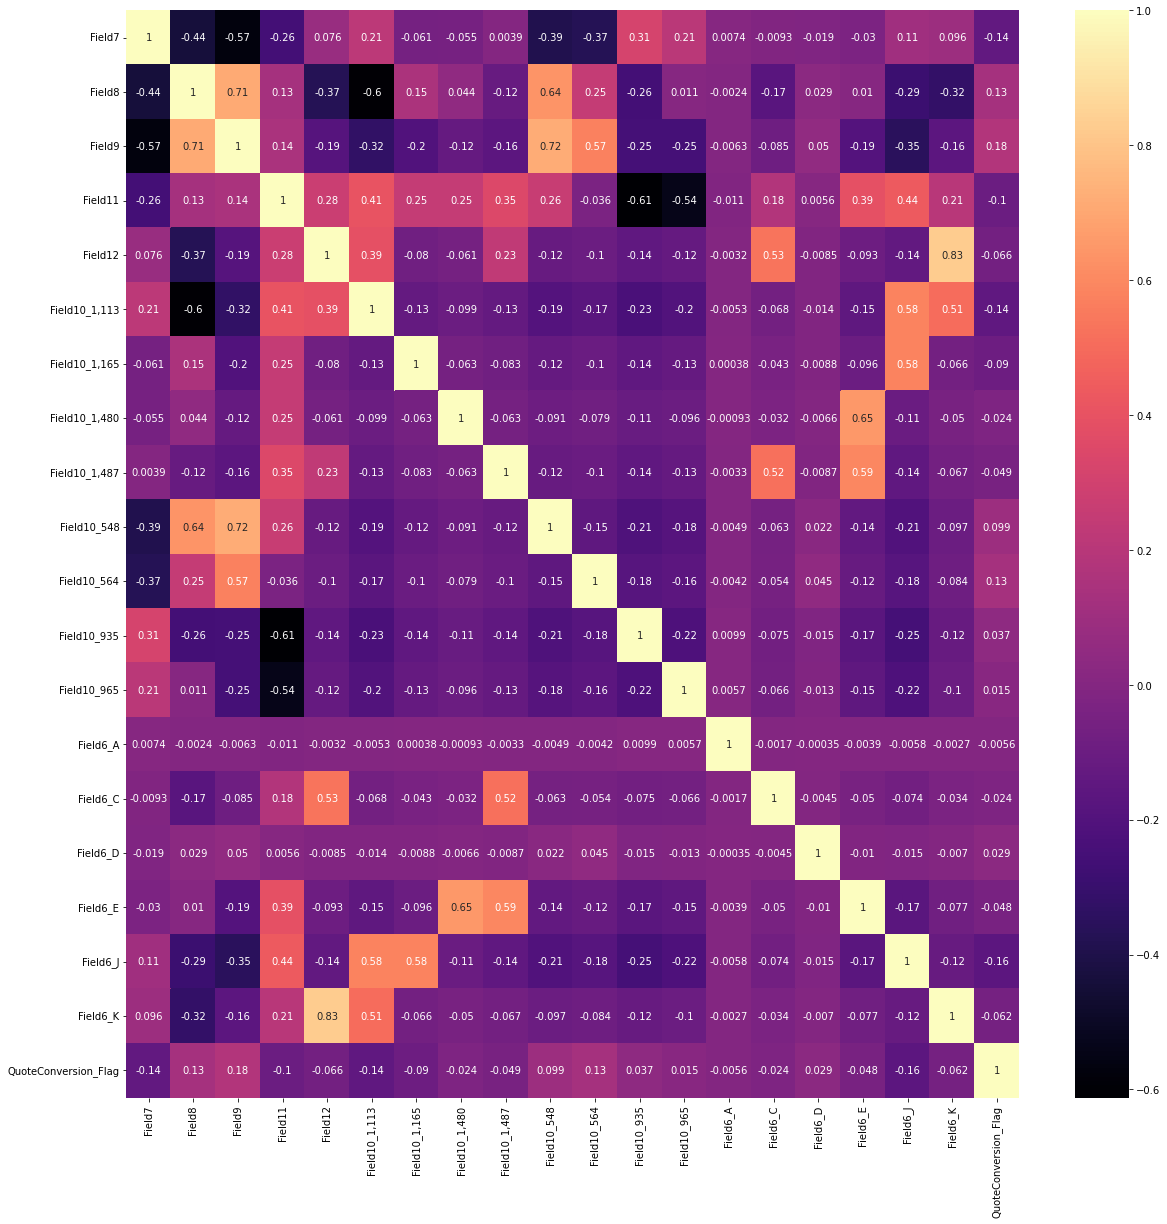

In [17]:
y = final_df['QuoteConversion_Flag']
X_field = final_df[field_cols]
X_field['QuoteConversion_Flag'] = final_df['QuoteConversion_Flag']

corr_mat = X_field.corr()
top_corr_features_field = corr_mat.index
plt.figure(figsize=(20,20))

h = sns.heatmap(X_field[top_corr_features_field].corr(), annot = True, cmap = "magma")

final_field_feature = []
final_field_feature = X_field[top_corr_features_field].corr()[(X_field[top_corr_features_field].corr().values > 0.70) & (X_field[top_corr_features_field].corr().values < 1.000000)].index.unique()

final_features = []
final_features.extend(final_field_feature.values)

print(final_features)

**17.b. Coverage Field Features**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['Field8', 'Field9', 'Field12', 'Field10_548', 'Field6_K', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'CoverageField8_W', 'CoverageField9_L']


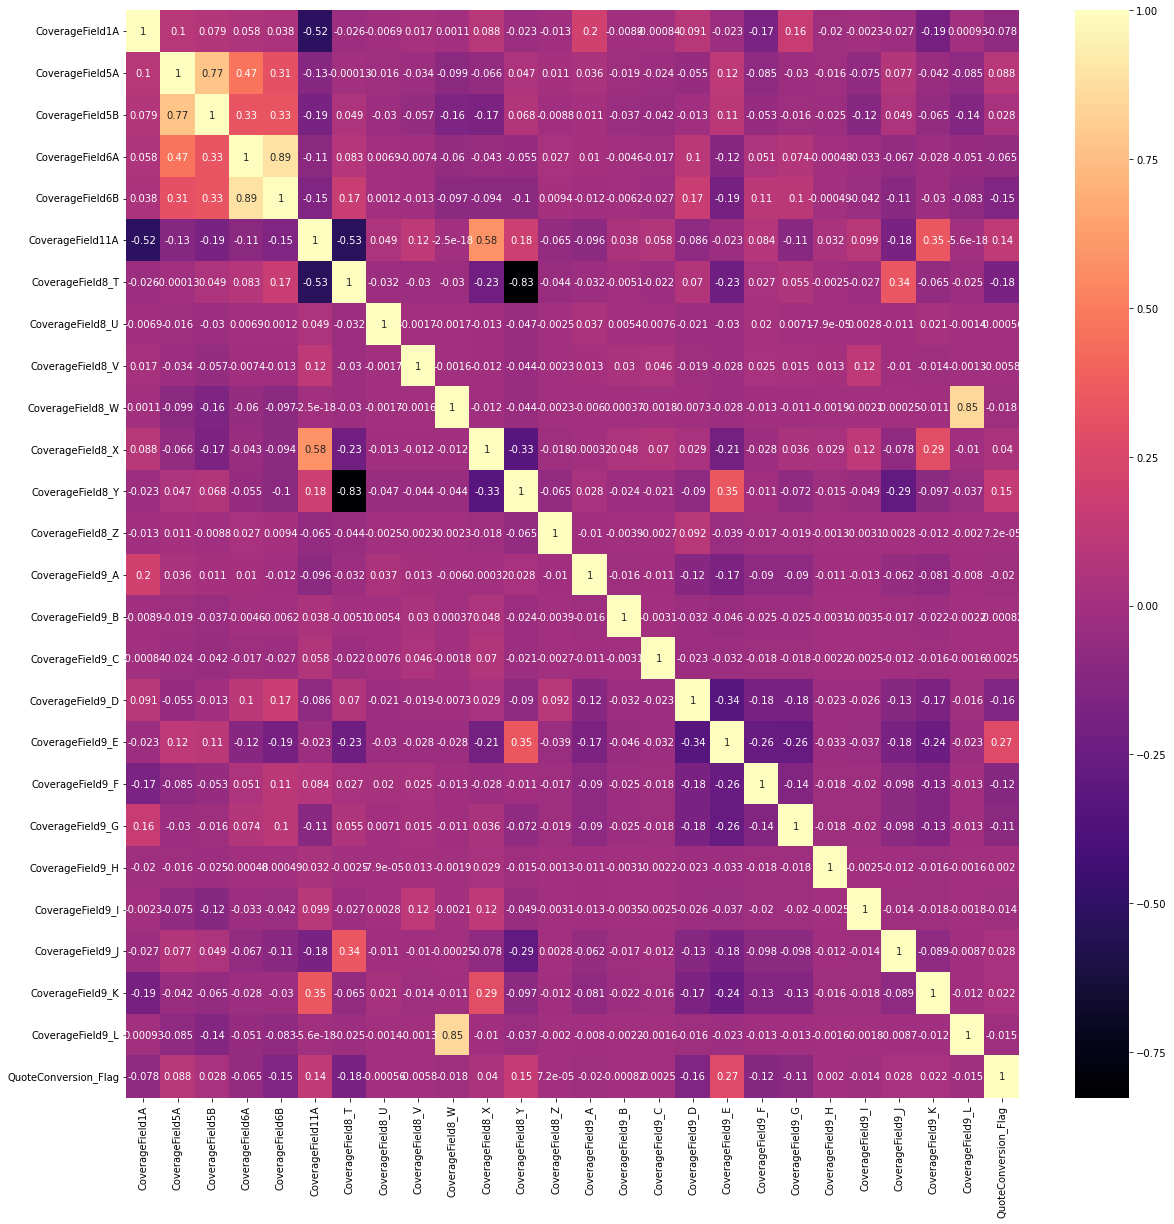

In [18]:
X_cov_field = final_df[coverage_field_cols]
X_cov_field['QuoteConversion_Flag'] = final_df['QuoteConversion_Flag']

corr_mat = X_cov_field.corr()
top_corr_features_cov_field = corr_mat.index
plt.figure(figsize=(20,20))

h = sns.heatmap(X_cov_field[top_corr_features_cov_field].corr(), annot = True, cmap = "magma")

final_cov_field_feature = []
final_cov_field_feature = X_cov_field[top_corr_features_cov_field].corr()[(X_cov_field[top_corr_features_cov_field].corr().values > 0.70) & (X_cov_field[top_corr_features_cov_field].corr().values < 1.000000)].index.unique()

final_features.extend(final_cov_field_feature.values)

print(final_features)

**17.c. Sales Field Features**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['Field8', 'Field9', 'Field12', 'Field10_548', 'Field6_K', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'CoverageField8_W', 'CoverageField9_L', 'SalesField1A', 'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField4', 'SalesField5', 'SalesField9', 'SalesField10', 'SalesField11', 'SalesField13', 'SalesField14', 'SalesField7_R']


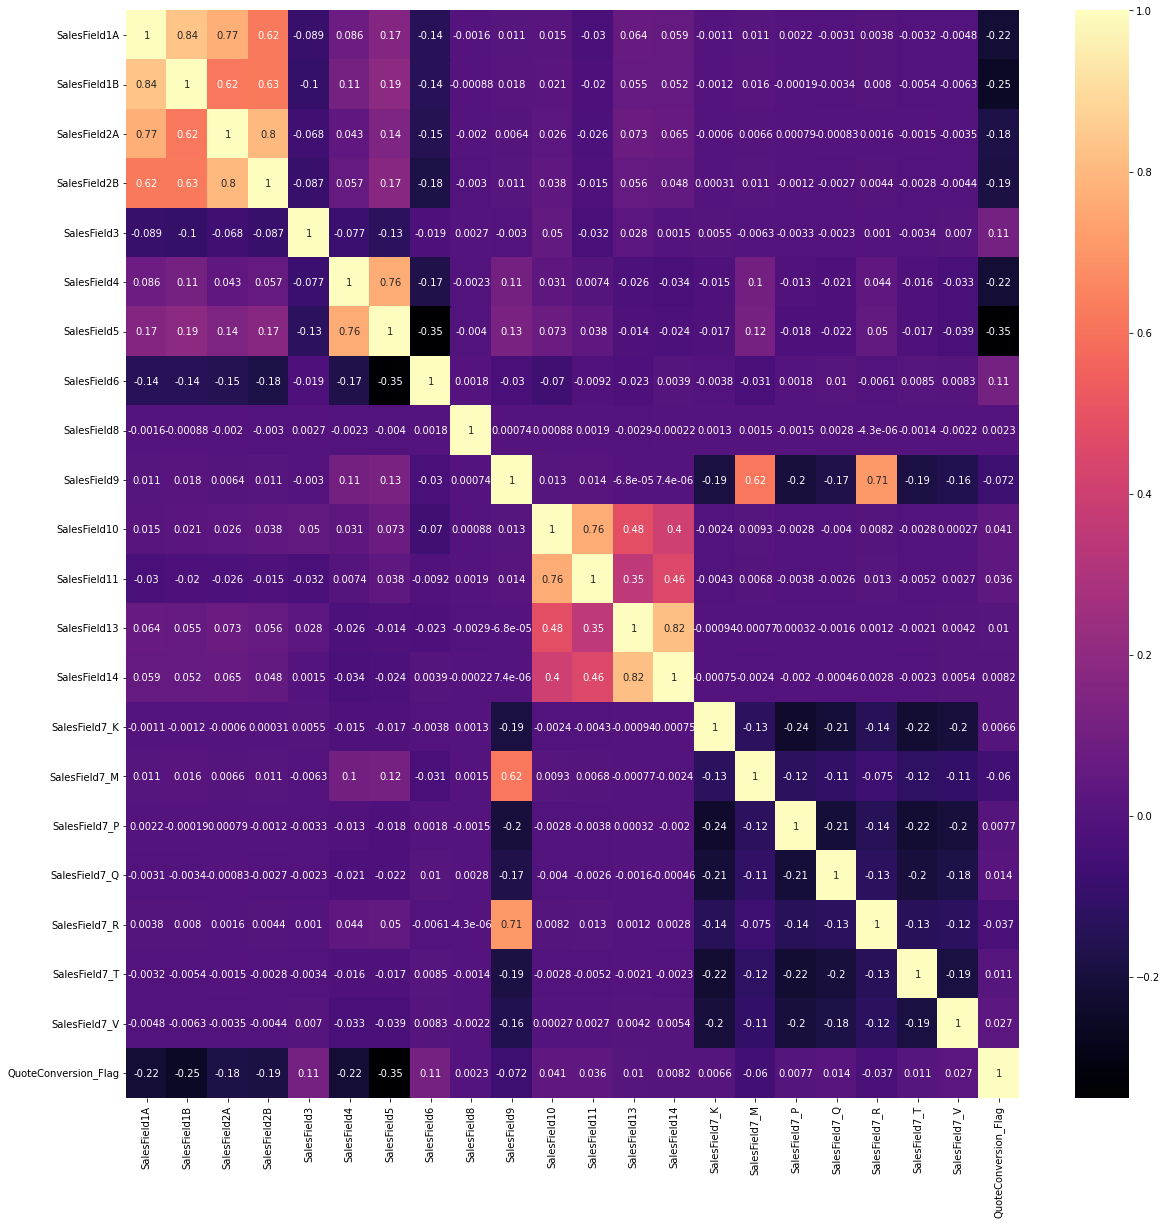

In [19]:
X_sales_field = final_df[sales_field_cols]
X_sales_field['QuoteConversion_Flag'] = final_df['QuoteConversion_Flag']

corr_mat = X_sales_field.corr()
top_corr_features_sales_field = corr_mat.index
plt.figure(figsize=(20,20))

h = sns.heatmap(X_sales_field[top_corr_features_sales_field].corr(), annot = True, cmap = "magma")

final_sales_field_feature = []
final_sales_field_feature = X_sales_field[top_corr_features_sales_field].corr()[(X_sales_field[top_corr_features_sales_field].corr().values > 0.70) & (X_sales_field[top_corr_features_sales_field].corr().values < 1.000000)].index.unique()

final_features.extend(final_sales_field_feature.values)

print(final_features)

**17.d. Personal Field Features**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['Field8', 'Field9', 'Field12', 'Field10_548', 'Field6_K', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'CoverageField8_W', 'CoverageField9_L', 'SalesField1A', 'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField4', 'SalesField5', 'SalesField9', 'SalesField10', 'SalesField11', 'SalesField13', 'SalesField14', 'SalesField7_R', 'PersonalField15', 'PersonalField22', 'PersonalField27', 'PersonalField28', 'PersonalField29', 'PersonalField30', 'PersonalField31', 'PersonalField39', 'PersonalField40', 'PersonalField64', 'PersonalField65', 'PersonalField66', 'PersonalField67', 'PersonalField69', 'PersonalField70', 'PersonalField74', 'PersonalField79', 'PersonalField16_XD', 'PersonalField16_XU', 'PersonalField16_ZO', 'PersonalField17_XM', 'PersonalField17_XO', 'PersonalField17_XS', 'PersonalField17_YP', 'PersonalField17_ZR', 'PersonalField19_XS', 'PersonalField19_YI']


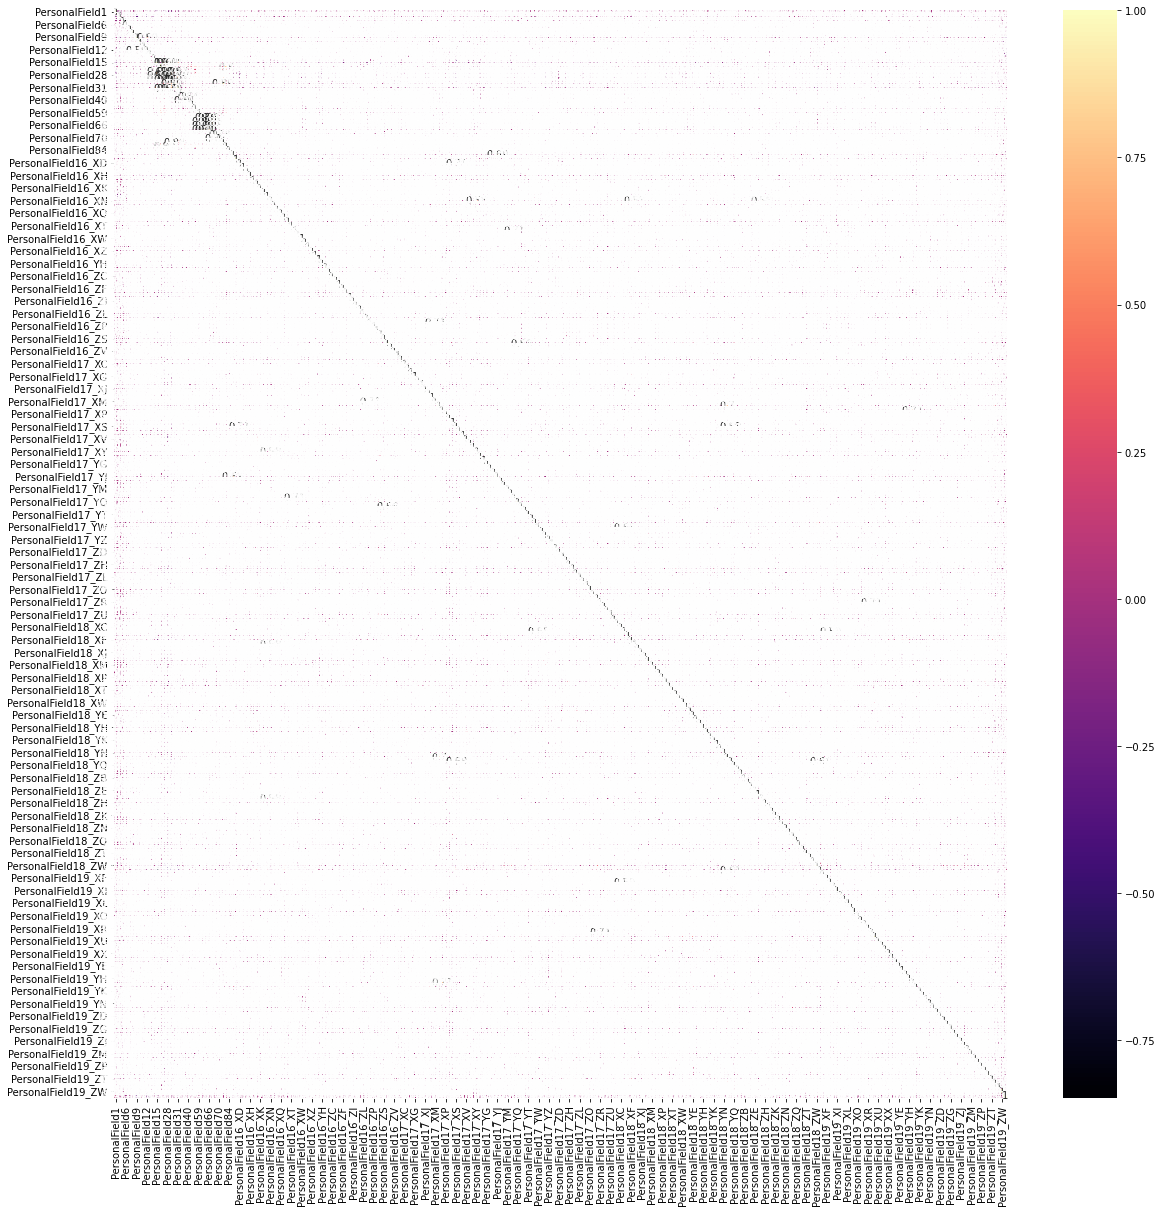

In [20]:
X_personal_field = final_df[personal_field_cols]
X_personal_field['QuoteConversion_Flag'] = final_df['QuoteConversion_Flag']

corr_mat = X_personal_field.corr()
top_corr_features_personal_field = corr_mat.index
plt.figure(figsize=(20,20))

h = sns.heatmap(X_personal_field[top_corr_features_personal_field].corr(), annot = True, cmap = "magma")

final_personal_field_feature = []
final_personal_field_feature = X_personal_field[top_corr_features_personal_field].corr()[(X_personal_field[top_corr_features_personal_field].corr().values > 0.70) & (X_personal_field[top_corr_features_personal_field].corr().values < 1.000000)].index.unique()

final_features.extend(final_personal_field_feature.values)

print(final_features)

**17.e. Property Field Features**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['Field8', 'Field9', 'Field12', 'Field10_548', 'Field6_K', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'CoverageField8_W', 'CoverageField9_L', 'SalesField1A', 'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField4', 'SalesField5', 'SalesField9', 'SalesField10', 'SalesField11', 'SalesField13', 'SalesField14', 'SalesField7_R', 'PersonalField15', 'PersonalField22', 'PersonalField27', 'PersonalField28', 'PersonalField29', 'PersonalField30', 'PersonalField31', 'PersonalField39', 'PersonalField40', 'PersonalField64', 'PersonalField65', 'PersonalField66', 'PersonalField67', 'PersonalField69', 'PersonalField70', 'PersonalField74', 'PersonalField79', 'PersonalField16_XD', 'PersonalField16_XU', 'PersonalField16_ZO', 'PersonalField17_XM', 'PersonalField17_XO', 'PersonalField17_XS', 'PersonalField17_YP', 'PersonalField17_ZR', 'PersonalField19_XS', 'PersonalField19_YI', 'PropertyField21A', 'PropertyField24A', 'PropertyField32', 'PropertyField35', 'PropertyField

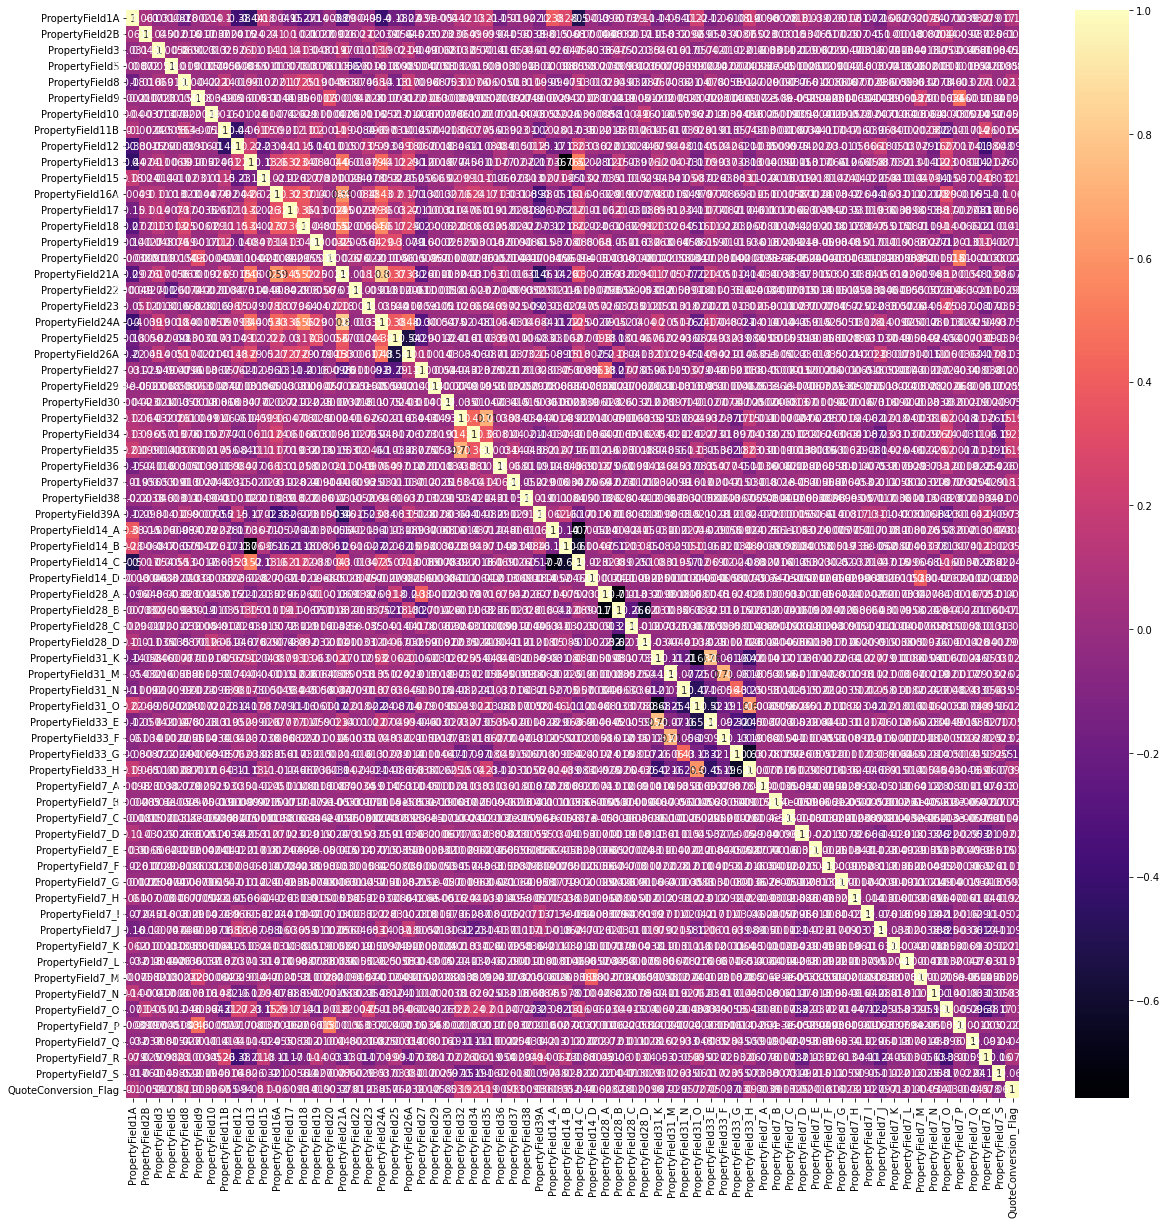

In [21]:
X_property_field = final_df[property_field_cols]
X_property_field['QuoteConversion_Flag'] = final_df['QuoteConversion_Flag']

corr_mat = X_property_field.corr()
top_corr_features_property_field = corr_mat.index
plt.figure(figsize=(20,20))

h = sns.heatmap(X_property_field[top_corr_features_property_field].corr(), annot = True, cmap = "magma")

final_property_field_feature = []
final_property_field_feature = X_property_field[top_corr_features_property_field].corr()[(X_property_field[top_corr_features_property_field].corr().values > 0.70) & (X_property_field[top_corr_features_property_field].corr().values < 1.000000)].index.unique()

final_features.extend(final_property_field_feature.values)

print(final_features)

**17.f. Graphic Field Features**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['Field8', 'Field9', 'Field12', 'Field10_548', 'Field6_K', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'CoverageField8_W', 'CoverageField9_L', 'SalesField1A', 'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField4', 'SalesField5', 'SalesField9', 'SalesField10', 'SalesField11', 'SalesField13', 'SalesField14', 'SalesField7_R', 'PersonalField15', 'PersonalField22', 'PersonalField27', 'PersonalField28', 'PersonalField29', 'PersonalField30', 'PersonalField31', 'PersonalField39', 'PersonalField40', 'PersonalField64', 'PersonalField65', 'PersonalField66', 'PersonalField67', 'PersonalField69', 'PersonalField70', 'PersonalField74', 'PersonalField79', 'PersonalField16_XD', 'PersonalField16_XU', 'PersonalField16_ZO', 'PersonalField17_XM', 'PersonalField17_XO', 'PersonalField17_XS', 'PersonalField17_YP', 'PersonalField17_ZR', 'PersonalField19_XS', 'PersonalField19_YI', 'PropertyField21A', 'PropertyField24A', 'PropertyField32', 'PropertyField35', 'PropertyField

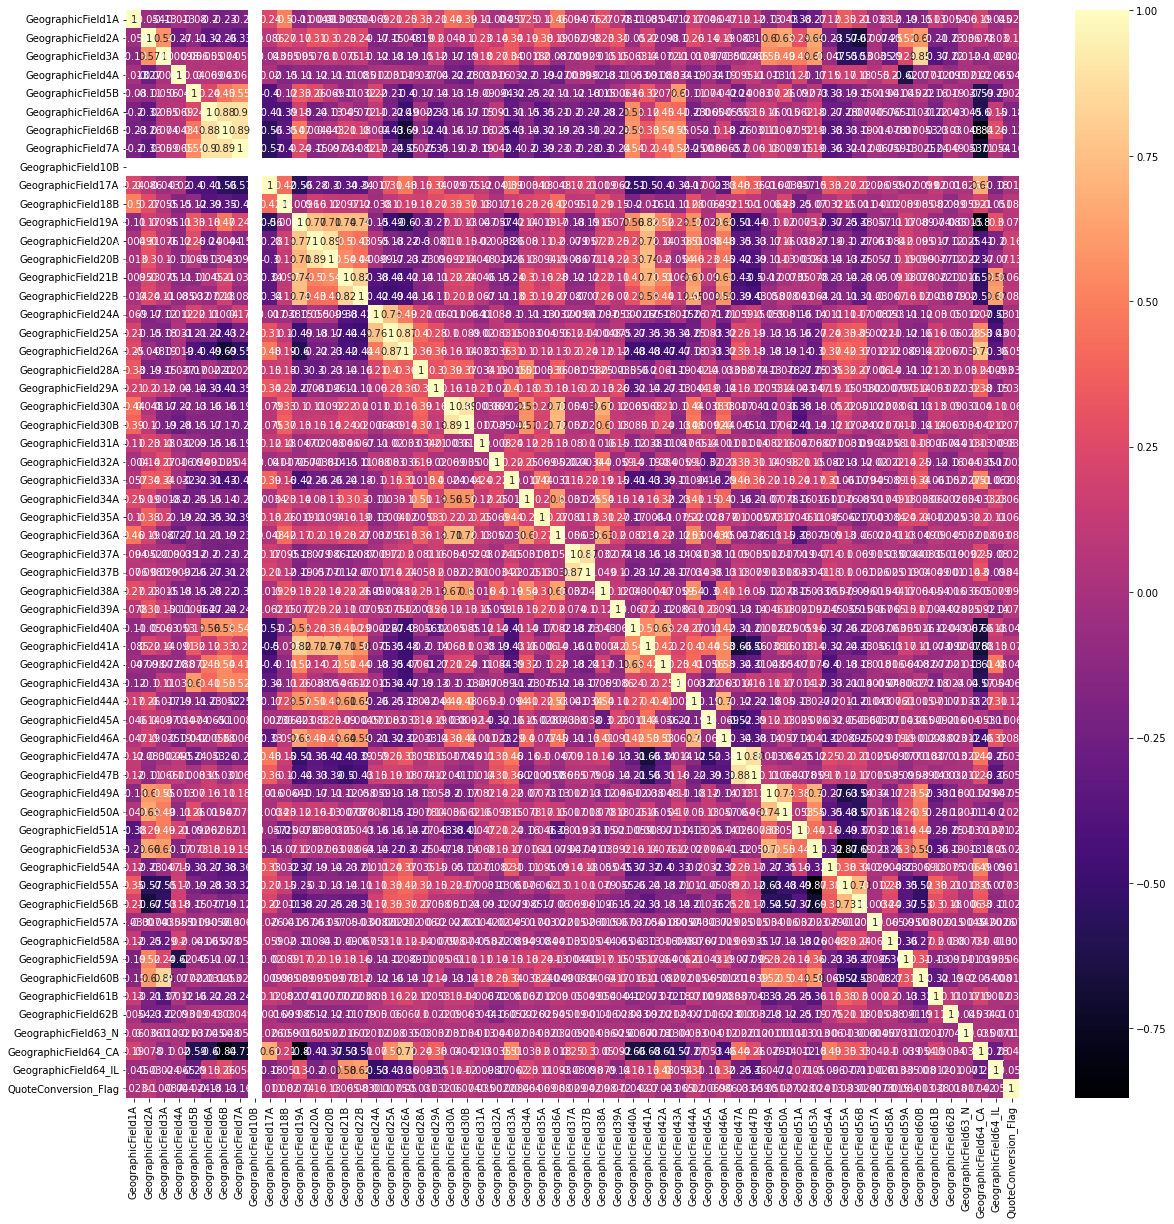

In [22]:
X_graphic_field = final_df[graphic_field_cols]
X_graphic_field['QuoteConversion_Flag'] = final_df['QuoteConversion_Flag']

corr_mat = X_graphic_field.corr()
top_corr_features_graphic_field = corr_mat.index
plt.figure(figsize=(20,20))

h = sns.heatmap(X_graphic_field[top_corr_features_graphic_field].corr(), annot = True, cmap = "magma")

final_graphic_field_feature = []
final_graphic_field_feature = X_graphic_field[top_corr_features_graphic_field].corr()[(X_graphic_field[top_corr_features_graphic_field].corr().values > 0.70) & (X_graphic_field[top_corr_features_graphic_field].corr().values < 1.000000)].index.unique()

final_features.extend(final_graphic_field_feature.values)

print(final_features)

**18. Plotting the Correlation Matrix for the extracted important features.**

---

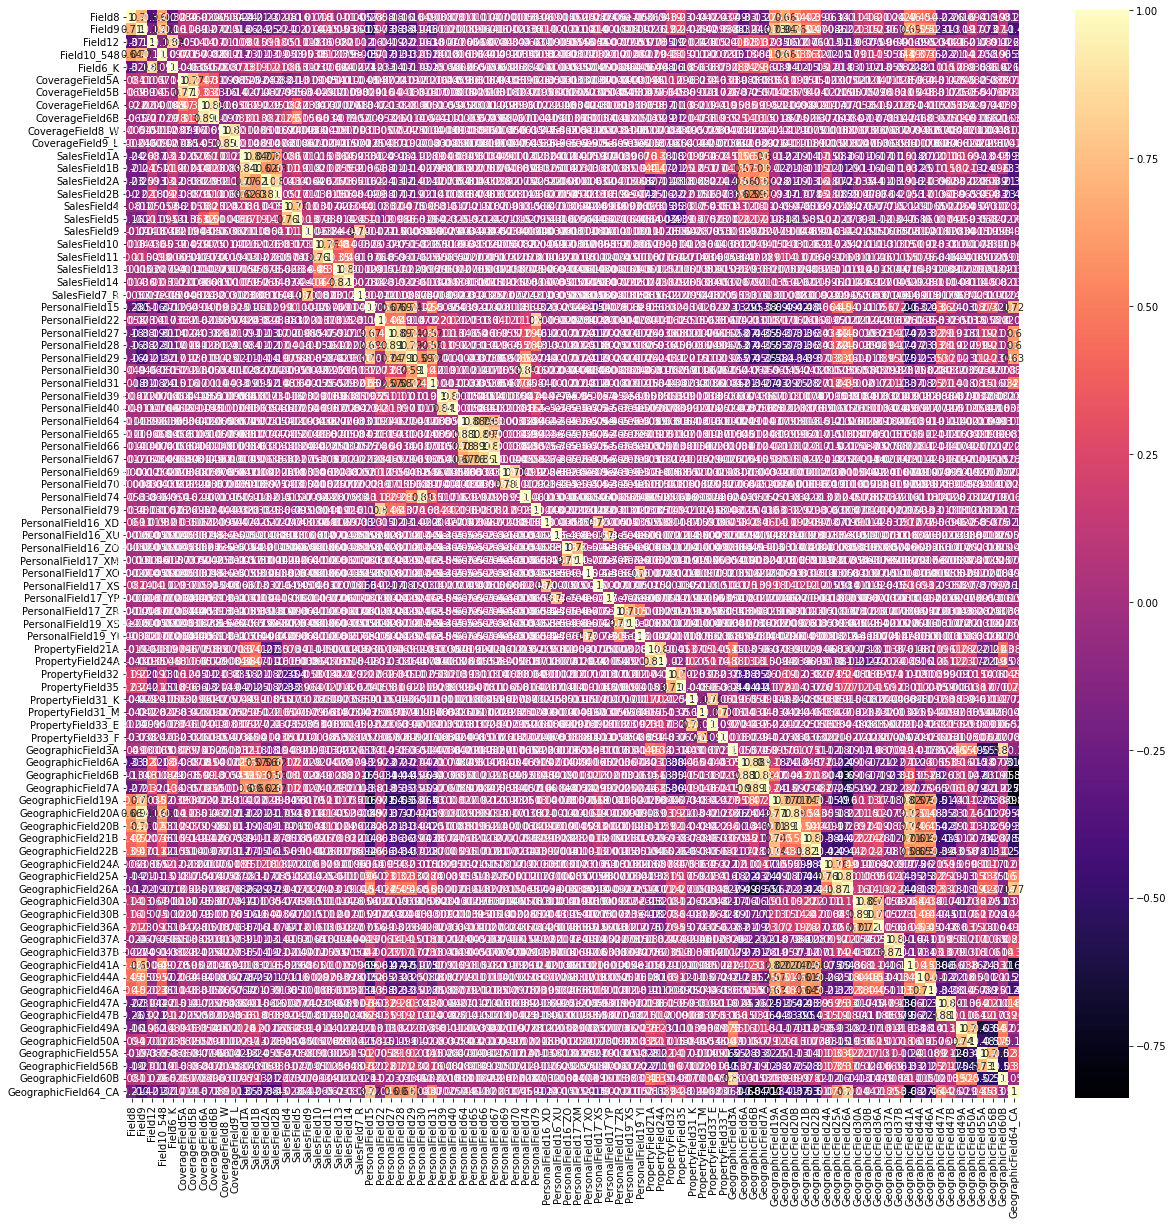

In [23]:
# Correlation matrix with HeatMap.

y = final_df['QuoteConversion_Flag'].head(20000)
X = final_df[final_features]

corr_mat = X.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20))

h = sns.heatmap(X[top_corr_features].corr(), annot = True, cmap = "magma")

**19. Visualization using PCA.**

---




In [24]:
#Visualization using PCA

# Seperating X-data and Y-data

quote_flag = final_df['QuoteConversion_Flag']
X = final_df[final_features]

#X = final_df.drop("QuoteConversion_Flag", axis = 1)

print(quote_flag.shape)
print(X.shape)

(260753,)
(260753, 86)


***Observation:*** We now have total of 86 features.

---

In [25]:
flags = quote_flag
data_pts = X

print(data_pts.shape)

(260753, 86)


***Conclusion:*** Getting the shape of the updated training data.

---

In [26]:
# Data Pre-processing using Data Standardization.

from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(data_pts)
print(std_data.shape)

(260753, 86)


***Observation:*** We are standardising the using StandardScaler.

---

In [27]:
# Let's check whether the normalized data has a mean of zero and a standard deviation of one.

np.mean(std_data), np.std(std_data)

(-1.687703754819828e-17, 1.0000000000000047)

***Observation:*** Mean:-1.68 and Std. Dev: 1.

---

**20. Plotting PCA by taking 40 components and check the variance.**

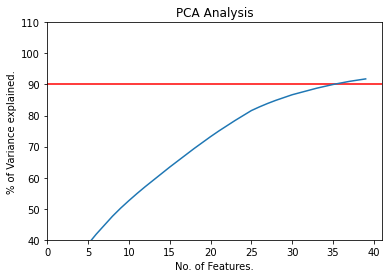

In [28]:
# Initialize PCA
from sklearn import decomposition
from sklearn.decomposition import PCA
import seaborn as sn
pca = decomposition.PCA()

# PCA configuration
pca_comp = PCA(n_components = 40)
pca_data = pca_comp.fit(std_data)

variance = pca_data.explained_variance_ratio_
var = np.cumsum(np.round(pca_data.explained_variance_ratio_, decimals = 3)*100)
var

plt.ylabel('% of Variance explained.')
plt.xlabel('No. of Features.')
plt.title('PCA Analysis')
plt.axhline(y=90, color = 'r', linestyle='-')
plt.ylim(40,110)
plt.xlim(0,41)
plt.plot(var)


***Observation:*** There are about 36 features which has around 90% of variance.

---



**Logistic Regression Model**

Splitting the Train and Test Data into 75% and 25% respectively.

In [29]:
from sklearn.model_selection import train_test_split

X_train = final_df[final_features]
Y_train = final_df['QuoteConversion_Flag']

X_tr, X_tst, y_tr, y_tst = train_test_split(
    X_train, Y_train, test_size=0.25, random_state=0
)

print('X_train: {0}'.format(X_tr.shape))
print('Y_train: {0}'.format(y_tr.shape))
print('X_test: {0}'.format(X_tst.shape))
print('Y_test: {0}'.format(X_tst.shape))

X_train: (195564, 86)
Y_train: (195564,)
X_test: (65189, 86)
Y_test: (65189, 86)


In [30]:
#Get the Predicted values using Logistic Regression
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()

logreg.fit(X_tr, y_tr)

y_pred = logreg.predict(X_tst)
print(y_pred)

[0 0 0 ... 0 0 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Confusion Matrix

In [31]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_tst, y_pred)
cnf_matrix

array([[50601,  2261],
       [ 9364,  2963]])

Text(0.5, 257.44, 'Predicted label')

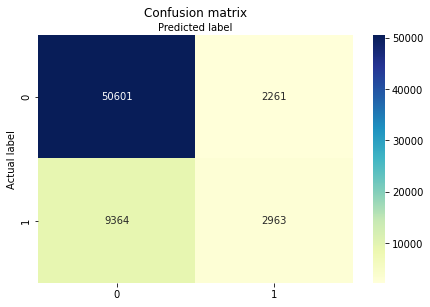

In [32]:
class_names = [0,1]

fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creating Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

***Observation:*** A total of 50,601 records have predicted the correct value with "Quote Not taken and a total of 2,963 records have predicted the correct value with "Quote taken".

Accuracy - Precision - Recall

In [33]:
print("Accuracy: ", metrics.accuracy_score(y_tst, y_pred))
print("Precision: ", metrics.precision_score(y_tst, y_pred))
print("Recall: ", metrics.recall_score(y_tst, y_pred))

Accuracy:  0.8216723680375524
Precision:  0.5671898928024502
Recall:  0.24036667477894053


***Observation:*** There is an accuracy of 82% while using Logistic Regression.

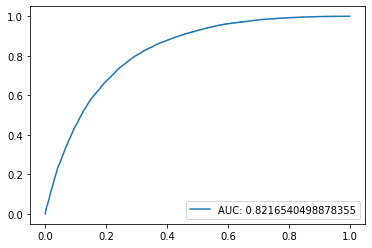

In [34]:
y_pred_proba = logreg.predict_proba(X_tst)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_tst,  y_pred_proba)
auc = metrics.roc_auc_score(y_tst, y_pred_proba)
plt.plot(fpr,tpr,label="AUC: "+str(auc))
plt.legend(loc=4)
plt.show()

***Observation:*** There is an accuracy of 82% when used Logistic Regression Model.

**Computing the Log-Loss for Logistic Regression**

In [50]:
print("Logistic Regression Log-loss:")
print(metrics.log_loss(y_tst, y_pred))

Logistic Regression Log-loss:
6.159245938434802


***Observation:*** In Logistic Regression when calculated the Log Loss between the Actual Class Label and the Predicted Class Label, the Log Loss score is 6.15.

**Decision Tree Model**

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_tr, y_tr)

y_dt_pred = decision_tree.predict(X_tst)

print(classification_report(y_tst, y_dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     52862
           1       0.41      0.43      0.42     12327

    accuracy                           0.78     65189
   macro avg       0.64      0.65      0.64     65189
weighted avg       0.78      0.78      0.78     65189



***Observation:*** With 65,189 records, we could see an accuracy of 78%.

**Computing the Log Loss for Decision Tree**

In [43]:
print("Decision Tree Log-loss:")
print(metrics.log_loss(y_tst, y_dt_pred))

Decision Tree Log-loss:
7.718057191954796


***Observation:*** In Decision Tree when calculated the Log Loss between the Actual Class Label and the Predicted Class Label, the Log Loss score is 7.71.

***Conclusion:*** Since the Log Loss is less in Logistic Regerssion when compared to Decision Tree, we can now say that Logistic Regression is better than Decision Tree.